In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import h5py
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import G2Net2022Dataset
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score

from transforms import *
import albumentations as A

In [3]:
# from ffc_fix import FFC_BN_ACT

In [4]:
# from architectures import *
# model = ClassificationModel(
#     classification_model='swin_base_patch4_window12_384',
#     in_chans=2,
#     num_classes=1,
#     custom_preprocess='chris_debias',
#     custom_classifier='avg',
# )
# model = SegmentationAndClassification(
#     segmentation_model='timm-efficientnet-b0',
#     classification_model='tf_efficientnet_b0_ns',
#     in_chans=2,
#     num_classes=1,
#     custom_preprocess='chris_debias',
#     custom_classifier='avg',
#     return_mask=True
# )

# model(torch.empty((2, 2, 352, 640)))[1].shape

In [5]:
df = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/train_labels.csv')
test = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/sample_submission.csv')
df = df.loc[df['target'] != -1]

In [6]:
v23 = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/v23v.csv')
v18s = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/v18s.csv')

In [7]:
# pd.concat([v23[['Alpha', 'Delta']].dropna(), v18s[['Alpha', 'Delta']]], axis=0).duplicated().sum()

torch.Size([3, 360, 512])


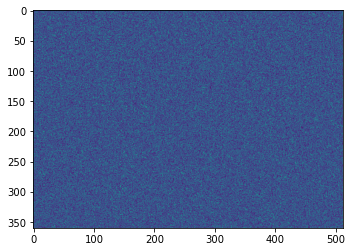

In [8]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from transforms import *

ds = G2Net2022Dataset(
    test, 
    data_dir=Path('input/g2net-detecting-continuous-gravitational-waves/test'), 
    # match_time=True,
    spec_diff=True,
    resize_factor=8, 
    transforms=A.Compose([
        # A.Resize(360, 1024), 
        ShiftImage(x_max=100, y_max=100, p=1.0),
        RandomCrop(512),
        ToTensorV2(), 
        # FrequencyMaskingTensor(p=1.0), 
        # TimeMaskingTensor(128, p=1.0),
        # FrequencyMaskingTensor(p=1.0),
        ]),
    normalize='laeyoung')
for i in range(20):
    data = ds[i][0]
    print(data.shape)
    # plt.imshow(data.permute(1,2,0)[:, :1000])
    plt.imshow(ds[i][0][0, :, :1000])
    plt.show()
    break

# Get metadata

In [ ]:
# signal_summary = []
# ds = G2Net2022Dataset(df, resize_factor=4, )
# for idx in tqdm(range(len(df))):
#     try:
#         spec_h1, spec_l1 = ds[idx][0]
#     except:
#         print(f'ERROR: {idx}')
#         continue
#     signal_summary.append({
#         'idx': idx,
#         'h1_mean': spec_h1.mean().item(),
#         'h1_max': spec_h1.max().item(),
#         'h1_min': spec_h1.min().item(),
#         'l1_mean': spec_l1.mean().item(),
#         'l1_max': spec_l1.max().item(),
#         'l1_min': spec_l1.min().item()
#     })
# signal_summary = pd.DataFrame(signal_summary)


In [ ]:
# signal_summary.describe()

In [ ]:
# def count_gaps(timestamps, Tsft=1800):
#     gap_length = timestamps[1:] - (timestamps[:-1] + Tsft)
#     return (gap_length > 0).sum()

In [ ]:
# signal_summary = []
# for gid in tqdm(df['id'].values[:100]):
#     fname = Path(f'input/g2net-detecting-continuous-gravitational-waves/train/{gid}.pickle')
#     # with h5py.File(fname, 'r') as f:
#     with open(fname, 'rb') as fp:
#         f = pickle.load(fp)
#         freq = list(f[gid]['frequency_Hz'])
#         sig_h1, time_h1 = f[gid]['H1']['SFTs']*1e22, np.array(f[gid]['H1']['timestamps_GPS'])
#         sig_l1, time_l1 = f[gid]['L1']['SFTs']*1e22, np.array(f[gid]['L1']['timestamps_GPS'])
#         sig_h1 = sig_h1.real ** 2 + sig_h1.imag ** 2
#         sig_l1 = sig_l1.real ** 2 + sig_l1.imag ** 2
#         ts_start_h1, ts_end_h1 = time_h1[0], time_h1[-1]
#         ts_start_l1, ts_end_l1 = time_l1[0], time_l1[-1]
#         signal_summary.append({
#             'idx': gid,
#             'ts_start_h1': ts_start_h1,
#             'ts_end_h1': ts_end_h1,
#             'num_gaps_h1': count_gaps(time_h1),
#             'length_h1': len(time_h1),
#             'max_h1': np.max(sig_h1),
#             '90%_h1': np.percentile(sig_h1, 90),
#             '25%_h1': np.percentile(sig_h1, 25),
#             '10%_h1': np.percentile(sig_h1, 10),
#             'ts_start_l1': ts_start_l1,
#             'ts_end_l1': ts_end_l1,
#             'num_gaps_l1': count_gaps(time_l1),
#             'length_l1': len(time_l1),
#             'max_l1': np.max(sig_l1),
#             '90%_l1': np.percentile(sig_l1, 90),
#             '25%_l1': np.percentile(sig_l1, 25),
#             '10%_l1': np.percentile(sig_l1, 10),
#         })
# signal_summary = pd.DataFrame(signal_summary)
# signal_summary.describe()

In [ ]:
# signal_summary = []
# for gid in tqdm(test['id']):
#     fname = Path(f'input/g2net-detecting-continuous-gravitational-waves/test/{gid}.pickle')
#     with open(fname, 'rb') as fp:
#         f = pickle.load(fp)
#         freq = list(f[gid]['frequency_Hz'])
#         sig_h1, time_h1 = f[gid]['H1']['SFTs']*1e22, np.array(f[gid]['H1']['timestamps_GPS'])
#         sig_l1, time_l1 = f[gid]['L1']['SFTs']*1e22, np.array(f[gid]['L1']['timestamps_GPS'])
#         sig_h1 = sig_h1.real ** 2 + sig_h1.imag ** 2
#         sig_l1 = sig_l1.real ** 2 + sig_l1.imag ** 2
#         ts_start_h1, ts_end_h1 = time_h1[0], time_h1[-1]
#         ts_start_l1, ts_end_l1 = time_l1[0], time_l1[-1]
#         signal_summary.append({
#             'idx': gid,
#             'ts_start_h1': ts_start_h1,
#             'ts_end_h1': ts_end_h1,
#             'num_gaps_h1': count_gaps(time_h1),
#             'length_h1': len(time_h1),
#             'max_h1': np.max(sig_h1),
#             '90%_h1': np.percentile(sig_h1, 90),
#             '25%_h1': np.percentile(sig_h1, 25),
#             '10%_h1': np.percentile(sig_h1, 10),
#             'ts_start_l1': ts_start_l1,
#             'ts_end_l1': ts_end_l1,
#             'num_gaps_l1': count_gaps(time_l1),
#             'length_l1': len(time_l1),
#             'max_l1': np.max(sig_l1),
#             '90%_l1': np.percentile(sig_l1, 90),
#             '25%_l1': np.percentile(sig_l1, 25),
#             '10%_l1': np.percentile(sig_l1, 10),
#         })
# signal_summary = pd.DataFrame(signal_summary)
# signal_summary.describe()

In [ ]:
# signal_summary.to_csv('input/signal_summary.csv', index=False)

In [15]:
# signal_stat = {}
# # for gid in ['228955f70']:
# for gid in tqdm(test['id']):
#     fname = Path(f'input/g2net-detecting-continuous-gravitational-waves/test/{gid}.pickle')
#     with open(fname, 'rb') as fp:
#         f = pickle.load(fp)
#         freq = f[gid]['frequency_Hz']
#         sig_h1, time_h1 = f[gid]['H1']['SFTs']*1e22, np.array(f[gid]['H1']['timestamps_GPS'])
#         sig_l1, time_l1 = f[gid]['L1']['SFTs']*1e22, np.array(f[gid]['L1']['timestamps_GPS'])
#         spec_h1 = sig_h1.real ** 2 + sig_h1.imag ** 2
#         spec_l1 = sig_l1.real ** 2 + sig_l1.imag ** 2
#         asd_h1_time, std_h1 = spec_h1.mean(0), spec_h1.std(0)
#         asd_l1_time, std_l1 = spec_l1.mean(0), spec_l1.std(0)
#         asd_h1_freq = spec_h1.mean(1)
#         asd_l1_freq = spec_l1.mean(1)
#         signal_stat[gid] = {}
#         signal_stat[gid]['H1'] = (asd_h1_time, asd_h1_freq, time_h1)
#         signal_stat[gid]['L1'] = (asd_l1_time, asd_l1_freq, time_l1)
#         signal_stat[gid]['freq'] = freq

In [10]:
# with open('input/signal_stat.pickle', 'wb') as f:
#     pickle.dump(signal_stat, f)

with open('input/signal_stat.pickle', 'rb') as f:
    signal_stat = pickle.load(f)

In [11]:
signal_stat_stat = []
for k, v in signal_stat.items():
    signal_stat_stat.append({
        'id': k,
        'H1_asd_mean': v['H1'][0].mean(),
        'H1_asd_std': v['H1'][0].std(),
        'H1_asd_median': np.percentile(v['H1'][0], 50),
        'H1_asd_max': v['H1'][0].max(),
        'H1_asd_median_freq': np.percentile(v['H1'][1], 50),
        'H1_asd_max_freq': v['H1'][1].max(),
        'L1_asd_mean': v['L1'][0].mean(),
        'L1_asd_std': v['L1'][0].std(),
        'L1_asd_max': v['L1'][0].max(),
        'L1_asd_median': np.percentile(v['L1'][0], 50),
        'L1_asd_max_freq': v['L1'][1].max(),
        'L1_asd_median_freq': np.percentile(v['L1'][1], 50),
    })
signal_stat_stat = pd.DataFrame(signal_stat_stat)

In [9]:
from transforms import adaptive_resize

def load_test_spec(gid, use_complex=False, return_time=False):
    fname = Path(f'input/g2net-detecting-continuous-gravitational-waves/test/{gid}.pickle')
    with open(fname, 'rb') as fp:
        f = pickle.load(fp)
        sig_h1, time_h1 = f[gid]['H1']['SFTs']*1e22, np.array(f[gid]['H1']['timestamps_GPS'])
        sig_l1, time_l1 = f[gid]['L1']['SFTs']*1e22, np.array(f[gid]['L1']['timestamps_GPS'])
    if use_complex:
        if return_time:
            return sig_h1, sig_l1, time_h1, time_l1
        else:
            return sig_h1, sig_l1
    else:
        spec_h1 = sig_h1.real ** 2 + sig_h1.imag ** 2
        spec_l1 = sig_l1.real ** 2 + sig_l1.imag ** 2
        if return_time:
            return spec_h1, spec_l1, time_h1, time_l1
        else:
            return spec_h1, spec_l1


def resize_image(img, img_size):
    return adaptive_resize(img[:, :, None], img_size, np.mean)[:, :, 0]


def extract_artifact(spec, n_sigma=8):
    if np.iscomplexobj(spec):
        spec = spec.real**2 + spec.imag**2
    spec_std = spec.std()
    spec_min = spec.min()
    amp_map = (spec - spec_min) / spec_std
    artifact_map = amp_map > n_sigma
    return artifact_map


def reconstruct_from_stat(mean_arr):
    spec = np.zeros((360, len(mean_arr)), dtype=np.float32)
    for t, mean in enumerate(mean_arr):
        spec[:, t] = np.random.chisquare(2, 360)
        factor = mean / spec[:, t].mean()
        spec[:, t] *= factor
    return spec


def reconstruct_from_stat_complex(mean_arr):
    real = np.random.normal(size=(360, len(mean_arr)))
    imag = np.random.normal(size=(360, len(mean_arr)))
    for t, mean in enumerate(mean_arr):
        factor = mean / (real[:, t]**2+imag[:, t]**2).mean()
        real[:, t] *= np.sqrt(factor)
        imag[:, t] *= np.sqrt(factor)
    return real + imag * 1j


def generate_from_stat(gid, signal_stat, artifact_sigma=8, use_complex=False):
    metadata = {
        'id': gid, 
        'nonstationary_H1': False, 
        'nonstationary_L1': False,
        'artifact_H1': False, 
        'artifact_L1': False,
    }
    asd_time_h1, asd_freq_h1, time_h1 = signal_stat[gid]['H1']
    asd_time_l1, asd_freq_l1, time_l1 = signal_stat[gid]['L1']
    freqs = signal_stat[gid]['freq']
    if asd_time_h1.max() > 3:
        metadata['nonstationary_H1'] = True
    if asd_time_l1.max() > 3:
        metadata['nonstationary_L1'] = True
    if asd_freq_h1.max() > 5 or asd_freq_h1.max() > 5:
        metadata['nonstationary_H1'] = True
        if use_complex:
            sft_gen = reconstruct_from_stat_complex(asd_time_h1.clip(0, 5))
            sft_org = load_test_spec(gid, use_complex=True)[0]
            artifact_map = extract_artifact(sft_org, artifact_sigma)
            sft_gen[np.where(artifact_map)] = sft_org[np.where(artifact_map)]
            spec_gen_h1 = sft_gen.real**2 + sft_gen.imag**2
        else:
            spec_gen_h1 = reconstruct_from_stat(asd_time_h1.clip(0, 5))
            spec_org = load_test_spec(gid)[0]
            artifact_map = extract_artifact(spec_org, artifact_sigma)
            spec_gen_h1[np.where(artifact_map)] = spec_org[np.where(artifact_map)]
    else:
        if use_complex:
            sft_gen = reconstruct_from_stat_complex(asd_time_h1.clip(0, 10))
            spec_gen_h1 = sft_gen.real**2 + sft_gen.imag**2
        else:
            spec_gen_h1 = reconstruct_from_stat(asd_time_h1.clip(0, 10))
    if asd_freq_l1.max() > 5 or asd_freq_l1.max() > 5:
        metadata['nonstationary_L1'] = True
        if use_complex:
            sft_gen = reconstruct_from_stat_complex(asd_time_l1.clip(0, 5))
            sft_org = load_test_spec(gid, use_complex=True)[1]
            artifact_map = extract_artifact(sft_org, artifact_sigma)
            sft_gen[np.where(artifact_map)] = sft_org[np.where(artifact_map)]
            spec_gen_l1 = sft_gen.real**2 + sft_gen.imag**2
        else:
            spec_gen_l1 = reconstruct_from_stat(asd_time_h1.clip(0, 5))
            spec_org = load_test_spec(gid)[1]
            artifact_map = extract_artifact(spec_org, artifact_sigma)
            spec_gen_l1[np.where(artifact_map)] = spec_org[np.where(artifact_map)]
    else:
        if use_complex:
            sft_gen = reconstruct_from_stat_complex(asd_time_l1.clip(0, 10))
            spec_gen_l1 = sft_gen.real**2 + sft_gen.imag**2
        else:
            spec_gen_l1 = reconstruct_from_stat(asd_time_l1.clip(0, 10))
    return {
        'H1': {
            'spectrogram': spec_gen_h1,
            'timestamps': time_h1,
        }, 
        'L1': {
            'spectrogram': spec_gen_l1,
            'timestamps': time_l1,
        },
        'frequency': freqs
    }


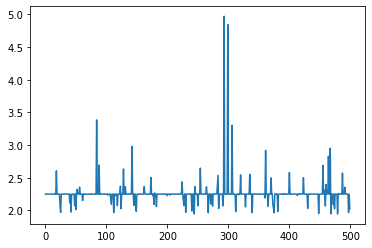

In [12]:
plt.plot(signal_stat_stat['L1_asd_mean'].clip(0, 5).iloc[:500])

In [13]:
signal_stat_stat

,id,H1_asd_mean,H1_asd_std,H1_asd_median,H1_asd_max,H1_asd_median_freq,H1_asd_max_freq,L1_asd_mean,L1_asd_std,L1_asd_max,L1_asd_median,L1_asd_max_freq,L1_asd_median_freq
0,00054c878,2.251315,0.118761,2.253212,2.698138,2.251550,2.350245,2.247697,0.120393,2.676944,2.245868,2.339644,2.247718
1,0007285a3,2.249648,0.118474,2.247805,2.757737,2.248661,2.358919,2.253814,0.119022,2.659317,2.253208,2.366923,2.253304
2,00076c5a6,2.249535,0.118194,2.246204,2.655239,2.248962,2.345180,2.250063,0.118636,2.667745,2.248820,2.383590,2.248833
3,001349290,2.251041,0.118517,2.249992,2.676809,2.249067,2.377609,2.251271,0.119876,2.749345,2.248053,2.353629,2.251383
4,001a52e92,2.250895,0.119663,2.250525,2.661041,2.250123,2.346444,2.249981,0.119231,2.765754,2.246825,2.358841,2.251568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7970,ffbce04ef,2.245802,0.117858,2.243596,2.687692,2.246334,2.329053,2.250713,0.118611,2.823246,2.248490,2.332948,2.252020
7971,ffc2d976b,2.247059,0.117080,2.245968,2.701608,2.246920,2.345719,2.252228,0.116468,2.745701,2.249779,2.356481,2.252927
7972,ffc905909,2.249271,0.117814,2.245618,2.681393,2.250696,2.339463,2.253107,0.118931,2.749691,2.250246,2.347795,2.252644
7973,ffe276f3e,2.249999,0.118203,2.247597,2.727818,2.248194,2.343063,2.249995,0.119038,2.690517,2.246475,2.339591,2.246579


In [14]:
signal_stat_stat['H1_max_median_ratio'] = signal_stat_stat['H1_asd_max'] / signal_stat_stat['H1_asd_median']
signal_stat_stat['H1_max_median_ratio_freq'] = signal_stat_stat['H1_asd_max_freq'] / signal_stat_stat['H1_asd_median_freq']
signal_stat_stat['L1_max_median_ratio'] = signal_stat_stat['L1_asd_max'] / signal_stat_stat['L1_asd_median']
signal_stat_stat['L1_max_median_ratio_freq'] = signal_stat_stat['L1_asd_max_freq'] / signal_stat_stat['L1_asd_median_freq']

In [15]:
# signal_stat_stat.query('10 < H1_asd_max or 10 < L1_asd_max') # Query for non-time-consistent artifact
# signal_stat_stat.query('10 < H1_asd_max_freq or 10 < H1_max_median_ratio_freq') # Query for time-consistent artifact

artifact_test = signal_stat_stat.query('5 < H1_asd_max or 5 < L1_asd_max or 5 < H1_asd_max_freq or 5 < L1_asd_max_freq') # Query for time-consistent artifact

In [16]:
artifact_test

,id,H1_asd_mean,H1_asd_std,H1_asd_median,H1_asd_max,H1_asd_median_freq,H1_asd_max_freq,L1_asd_mean,L1_asd_std,L1_asd_max,L1_asd_median,L1_asd_max_freq,L1_asd_median_freq,H1_max_median_ratio,H1_max_median_ratio_freq,L1_max_median_ratio,L1_max_median_ratio_freq
18,006e25113,4.634546,0.819849,4.419677,10.960500,4.631757,4.858927,2.606079,0.313672,5.102825,2.560694,2.710314,2.608277,2.479932,1.049046,1.992751,1.039120
25,00948246a,2.269712,0.242418,2.260223,3.963722,2.252916,7.909545,1.969767,0.198541,3.452693,1.945392,2.039572,1.969144,1.753686,3.510804,1.774806,1.035766
84,025517630,3.113863,0.325220,3.108540,4.624075,3.113476,3.232817,3.384949,0.652561,11.590537,3.286339,6.393273,3.187577,1.487539,1.038331,3.526885,2.005684
88,027d43d14,4.115262,0.555314,3.989313,7.142843,4.114773,4.283946,2.694772,0.328340,5.099913,2.638278,2.801372,2.691780,1.790495,1.041114,1.933046,1.040714
102,02efaba20,2.843643,0.571504,2.732774,10.361210,2.842143,2.965214,2.234568,0.215226,3.528144,2.213850,2.334676,2.234815,3.791462,1.043302,1.593669,1.044685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,fd8617a36,2.848871,0.463340,2.753335,4.560507,2.830613,6.209828,2.267675,0.270372,4.703277,2.230042,2.379385,2.266577,1.656358,2.193810,2.109054,1.049770
7919,fe16f479a,2.560818,0.389665,2.543246,21.908636,2.560831,2.673910,2.202449,0.245219,3.464704,2.163311,2.286445,2.201763,8.614439,1.044157,1.601575,1.038461
7925,fe3005e83,5.331394,0.684518,5.201103,16.762011,5.149550,16.070335,3.442668,0.439342,11.142262,3.363258,3.585521,3.447580,3.222780,3.120726,3.312937,1.040011
7927,fe3983d5d,2.614527,0.310054,2.581337,9.060747,2.615827,2.721582,2.117731,0.222218,3.692711,2.088820,2.202183,2.117313,3.510098,1.040429,1.767845,1.040084


In [17]:
artifact_test.head()

,id,H1_asd_mean,H1_asd_std,H1_asd_median,H1_asd_max,H1_asd_median_freq,H1_asd_max_freq,L1_asd_mean,L1_asd_std,L1_asd_max,L1_asd_median,L1_asd_max_freq,L1_asd_median_freq,H1_max_median_ratio,H1_max_median_ratio_freq,L1_max_median_ratio,L1_max_median_ratio_freq
18,006e25113,4.634546,0.819849,4.419677,10.960500,4.631757,4.858927,2.606079,0.313672,5.102825,2.560694,2.710314,2.608277,2.479932,1.049046,1.992751,1.039120
25,00948246a,2.269712,0.242418,2.260223,3.963722,2.252916,7.909545,1.969767,0.198541,3.452693,1.945392,2.039572,1.969144,1.753686,3.510804,1.774806,1.035766
84,025517630,3.113863,0.325220,3.108540,4.624075,3.113476,3.232817,3.384949,0.652561,11.590537,3.286339,6.393273,3.187577,1.487539,1.038331,3.526885,2.005684
88,027d43d14,4.115262,0.555314,3.989313,7.142843,4.114773,4.283946,2.694772,0.328340,5.099913,2.638278,2.801372,2.691780,1.790495,1.041114,1.933046,1.040714
102,02efaba20,2.843643,0.571504,2.732774,10.361210,2.842143,2.965214,2.234568,0.215226,3.528144,2.213850,2.334676,2.234815,3.791462,1.043302,1.593669,1.044685


In [32]:
# for gid in artifact_test['id'].values:
#     plt.figure(figsize=(12, 4))
#     spec1, spec2 = load_test_spec(gid)
#     plt.subplot(1, 2, 1)
#     plt.imshow(resize_image(spec1, 720))
#     plt.subplot(1, 2, 2)
#     plt.imshow(resize_image(spec2, 720))
#     plt.suptitle(f'{gid}')
#     plt.savefig(f'input/plot/anomaly/{gid}.png', facecolor='white')
#     # plt.show()
#     plt.close()



In [18]:
nonsta_samples = v23.query('nonstationary_H1 == 1 or nonstationary_L1 == 1')
nonsta_samples['id'] = nonsta_samples['id'].str[:-4]
nonsta_samples['freq'] = nonsta_samples['id'].apply(lambda x: signal_stat[x]['freq'][0])
nonsta_samples.head()

/tmp/ipykernel_201388/1773079159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsta_samples['id'] = nonsta_samples['id'].str[:-4]
/tmp/ipykernel_201388/1773079159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsta_samples['freq'] = nonsta_samples['id'].apply(lambda x: signal_stat[x]['freq'][0])


,id,nonstationary_H1,nonstationary_L1,artifact_H1,artifact_L1,target,path,F0,F1,F2,Alpha,Delta,h0,cosi,psi,phi,signal_depth,freq
14,004f1b282,1,1,0,0,1,input/g2net-detecting-continuous-gravitational...,391.330556,-1.403066e-11,0.0,5.144738,0.639279,1.359817e-25,-0.030921,0.258517,4.908341,36.769652,391.330556
18,006e25113,1,1,0,0,1,input/g2net-detecting-continuous-gravitational...,479.195556,-2.759548e-12,0.0,3.135426,0.778584,1.090922e-25,-0.959764,-0.445705,0.228361,45.832771,479.195556
24,008ec5560,1,1,0,0,1,input/g2net-detecting-continuous-gravitational...,317.377778,1.049263e-09,0.0,0.822109,-0.146369,1.898551e-25,0.199898,-0.652497,5.526235,26.335874,317.377778
25,00948246a,1,1,1,0,0,input/g2net-detecting-continuous-gravitational...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.908889
40,0112d6cc3,1,1,0,0,1,input/g2net-detecting-continuous-gravitational...,335.437778,2.807486e-12,0.0,0.531316,1.277641,1.675196e-25,-0.549766,-0.317627,1.307634,29.847255,335.437778


In [100]:
stds = []
for gid in tqdm(nonsta_samples['id'].values[:300]):
    spec_h1, spec_l1 = load_test_spec(gid)
    stds.append(
        {'id': gid, 'std_h1': spec_h1.std(), 'std_l1':spec_l1.std()}
    )
stds = pd.DataFrame(stds)

  0%|          | 0/300 [00:00<?, ?it/s]

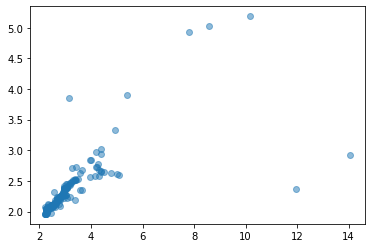

In [103]:
stds = stds.iloc[:200]
plt.scatter(x=stds['std_h1'], y=stds['std_l1'], alpha=0.5)

In [35]:
nonsta_samples.merge(stds.query('4 < std_h1 < 6 and std_l1 < 3'), on='id', how='inner').sort_values('freq')

NameError: name 'stds' is not defined

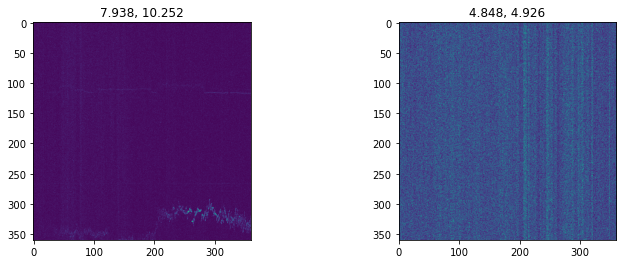

In [19]:
img_h1, img_l1 = load_test_spec('3cc6680fb')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(resize_image(img_h1, 360))
plt.title(f'{img_h1.mean():.3f}, {img_h1.std():.3f}')
plt.subplot(1, 2, 2)
plt.imshow(resize_image(img_l1, 360))
plt.title(f'{img_l1.mean():.3f}, {img_l1.std():.3f}')
plt.show()
plt.close()

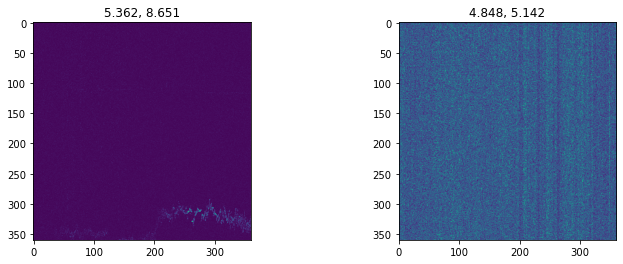

In [20]:
data_gen = generate_from_stat('3cc6680fb', signal_stat=signal_stat, artifact_sigma=5, use_complex=True)
img_h1 = data_gen['H1']['spectrogram']
img_l1 = data_gen['L1']['spectrogram']
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(resize_image(img_h1, 360))
plt.title(f'{img_h1.mean():.3f}, {img_h1.std():.3f}')
plt.subplot(1, 2, 2)
plt.imshow(resize_image(img_l1, 360))
plt.title(f'{img_l1.mean():.3f}, {img_l1.std():.3f}')
plt.show()

In [74]:
for i, (gid, f0) in enumerate(nonsta_samples.sort_values('freq')[['id', 'freq']].values):
    spec_h1, spec_l1, time_h1, time_l1 = load_test_spec(gid, return_time=True)
    plt.imshow(np.clip(spec_h1[:, :360], 0, 20))
    plt.title(f'{gid} {f0:.3f}')
    plt.savefig(f'input/plot/leak/{i}_{gid}.png', facecolor='white')
    plt.close()
    if i == 100:
        break

In [30]:
spec1, _, time1, _ = load_test_spec('fd0bde745',return_time=True)
freq1 = signal_stat['fd0bde745']['freq']
spec2, _, time2, _ = load_test_spec('5b10b1e61', return_time=True)
freq2 = signal_stat['5b10b1e61']['freq']

In [40]:
time1[:10], time2[:10]

(array([1238174136, 1238175936, 1238185163, 1238186963, 1238191404,
        1238192819, 1238194619, 1238196419, 1238198219, 1238200019]),
 array([1238169105, 1238170905, 1238172705, 1238174505, 1238176305,
        1238178105, 1238179905, 1238181705, 1238183505, 1238185305]))

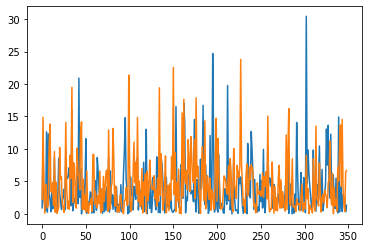

In [59]:
plt.plot(spec1[11:, 0])
plt.plot(spec2[:-11, 1])

In [57]:
for i in range(20):
    corr = np.corrcoef(spec1[11:, 0], spec2[:-11, i])[0, 1]
    print(i, corr)

0 0.06325953040605252
1 0.11163636627503261
2 0.08160809174983659
3 0.004311569446216793
4 0.025187865677689967
5 -0.015842156601345685
6 0.06530361959101925
7 -0.0330800373039464
8 -0.05932791833776186
9 0.08454003961576462
10 -0.010848014766729065
11 0.03701471737199853
12 0.03303815300989826
13 0.07419866886210205
14 0.011848821552132219
15 0.008208053966868651
16 -0.007615275124652718
17 0.08699570776434594
18 0.04940632233628064
19 -0.012483295143367653


In [24]:
time2

array([1238172661, 1238174461, 1238181239, ..., 1248554217, 1248556017,
       1248557817])

# Wave generation

In [7]:
import math
import pyfstat
from pyfstat.utils import get_sft_as_arrays
from transforms import adaptive_resize
import shutil
from prep_data_v18v import NoPrint, bucketize_real_noise_asd, TEST_DIR, C_SQRSX

DATASET = 'v18v'

C_SQRSX = 26.6
REF_SX = 5e-24
F1_MIN, F1_MAX = -12, -8 # new sampling
DP_MIN, DP_MID, DP_MAX = 20, 35, 50
test = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/sample_submission.csv')


def to_spectrogram(sfts):
    return sfts.real ** 2 + sfts.imag ** 2


def extract_artifact(spec):
    spec_std = spec.std()
    spec_min = spec.min()
    amp_map = (spec - spec_min) / spec_std
    artifact_map = amp_map > 10
    return artifact_map


def mix_artifact(sft1, sft2, artifact_map):
    assert sft2.shape == artifact_map.shape
    assert sft2.shape[0] == sft1.shape[0]
    if sft2.shape[1] > sft1.shape[1]:
        artifact_map = artifact_map[:, :sft1.shape[1]]
        sft2 = sft2[:, :sft1.shape[1]]
        sft1[artifact_map] = sft2[artifact_map]
    else:
        sft1[np.where(artifact_map)] = sft2[np.where(artifact_map)]
    return sft1
 

def make_data(gid, num_buckets=128, target='negative'):
    PROJ_DIR = Path(f'input/g2net-detecting-continuous-gravitational-waves/template_{num_buckets}/{gid}')
    PROJ_DIR.mkdir(parents=True, exist_ok=True)
    TMP_DIR = Path(f'pyfstat_tmp_{DATASET}/{gid}/')
    # load test data
    with open(TEST_DIR/f'{gid}.pickle', 'rb') as f:
        test = pickle.load(f)
        sft_h1, ts_h1 = test[gid]['H1']['SFTs'], test[gid]['H1']['timestamps_GPS']
        sft_l1, ts_l1 = test[gid]['L1']['SFTs'], test[gid]['L1']['timestamps_GPS']
        freqs = test[gid]['frequency_Hz']

    artifact_h1 = extract_artifact(to_spectrogram(sft_h1*1e22))
    artifact_l1 = extract_artifact(to_spectrogram(sft_l1*1e22))

    asd_h1, bs_h1 = bucketize_real_noise_asd(sft_h1, ts_h1, num_buckets)
    asd_l1, bs_l1 = bucketize_real_noise_asd(sft_l1, ts_l1, num_buckets)
    
    with NoPrint():
        noise_kwargs_h1 = {
            "outdir": str(TMP_DIR),
            "Tsft": 1800,
            "F0": np.mean(freqs),
            # "F0": freqs[0],
            "detectors": "H1",
            "SFTWindowType": "tukey",
            "SFTWindowBeta": 0.1,
            "Band": 0.4,
            "duration": bs_h1,
        }
        if (PROJ_DIR/'sft_list_h1.csv').exists():
            sft_paths_h1 = pd.read_csv(PROJ_DIR/'sft_list_h1.csv')['path'].tolist()
        else:
            tmp_paths = []
            sft_paths_h1 = []
            for segment in range(num_buckets):
                args = noise_kwargs_h1.copy()
                args["label"] = f"h1_segment_{segment}"
                args["sqrtSX"] = asd_h1[segment] / C_SQRSX
                args["tstart"] = ts_h1[0] + segment * bs_h1
                writer = pyfstat.Writer(**args)
                writer.make_data()
                tmp_paths.append(writer.sftfilepath)
            for path in tmp_paths:
                shutil.move(Path(path), PROJ_DIR)
                sft_paths_h1.append(str(PROJ_DIR/Path(path).name))
            pd.DataFrame({'path': sft_paths_h1}).to_csv(PROJ_DIR/'sft_list_h1.csv', index=False)

        if (PROJ_DIR/'sft_list_l1.csv').exists():
            sft_paths_l1 = pd.read_csv(PROJ_DIR/'sft_list_l1.csv')['path'].tolist()
        else:
            noise_kwargs_l1 = noise_kwargs_h1.copy()
            noise_kwargs_l1["detectors"] = "L1"
            noise_kwargs_l1["duration"] = bs_l1
            tmp_paths = []
            sft_paths_l1 = []
            for segment in range(num_buckets):
                args = noise_kwargs_l1.copy()
                args["label"] = f"l1_segment_{segment}"
                args["sqrtSX"] = asd_l1[segment] / C_SQRSX
                args["tstart"] = ts_l1[0] + segment * bs_l1
                writer = pyfstat.Writer(**args)
                writer.make_data()
                tmp_paths.append(writer.sftfilepath)
            for path in tmp_paths:
                shutil.move(Path(path), PROJ_DIR)
                sft_paths_l1.append(str(PROJ_DIR/Path(path).name))
            shutil.rmtree(TMP_DIR)
            pd.DataFrame({'path': sft_paths_l1}).to_csv(PROJ_DIR/'sft_list_l1.csv', index=False)
    
    if target == 'negative':
        signal_depth = 1000
        freqs_h1, times_h1, sft_data_h1 = get_sft_as_arrays(";".join(sorted(sft_paths_h1)))
        freqs_l1, times_l1, sft_data_l1 = get_sft_as_arrays(";".join(sorted(sft_paths_l1)))
    else:
        with NoPrint():
            signal_kwargs = {
                "outdir": str(TMP_DIR),
                "label": f'h1_signal',
                "F0": np.mean(freqs),
                "F1": np.random.choice([-1, 1]) * (10 ** np.random.uniform(F1_MIN, F1_MAX)),
                "F2": 0,
                "Alpha": np.random.uniform(0, math.pi * 2),
                "Delta": np.random.uniform(-math.pi/2, math.pi/2),
                # "h0": noise_kwargs_h1['sqrtSX'] / signal_depth,
                "cosi": np.random.uniform(-1, 1),
                "psi": np.random.uniform(-math.pi/4, math.pi/4),
                "phi": np.random.uniform(0, math.pi*2),
                "SFTWindowType": "tukey",
            }
            if target == 'strong': # 
                signal_depth = np.random.uniform(DP_MIN, DP_MID)
            elif target == 'weak': 
                signal_depth = np.random.uniform(DP_MID, DP_MAX)

            # H1
            signal_variety = np.random.uniform(0.95, 1.05)
            signal_kwargs['label'] = f'h1_signal'
            signal_kwargs['h0'] = REF_SX * signal_variety / signal_depth
            signal_kwargs['noiseSFTs'] = ";".join(sorted(sft_paths_h1))
            writer = pyfstat.Writer(**signal_kwargs)
            writer.make_data()
            freqs_h1, times_h1, sft_data_h1 = get_sft_as_arrays(writer.sftfilepath)
            # L1
            signal_variety = np.random.uniform(0.95, 1.05)
            signal_kwargs['label'] = f'l1_signal'
            signal_kwargs['h0'] = REF_SX * signal_variety / signal_depth
            signal_kwargs['noiseSFTs'] = ";".join(sorted(sft_paths_l1))
            writer = pyfstat.Writer(**signal_kwargs)
            writer.make_data()
            freqs_l1, times_l1, sft_data_l1 = get_sft_as_arrays(writer.sftfilepath)
            shutil.rmtree(TMP_DIR)

    ref_time = min(ts_h1.min(), ts_l1.min())
    frame_h1 = ((ts_h1 - ref_time) / 1800).round().astype(np.uint64)
    frame_l1 = ((ts_l1 - ref_time) / 1800).round().astype(np.uint64)

    times = {
        'H1': ts_h1[frame_h1 < sft_data_h1['H1'].shape[1]], 
        'L1': ts_l1[frame_l1 < sft_data_l1['L1'].shape[1]]}
    sft_data = {
        'H1': sft_data_h1['H1'][:, frame_h1[frame_h1 < sft_data_h1['H1'].shape[1]]], 
        'L1': sft_data_l1['L1'][:, frame_l1[frame_l1 < sft_data_l1['L1'].shape[1]]]}
    # slice_start = np.random.randint(75, 285)
    slice_start = 0
    sft_crop = {}
    for d in ['H1', 'L1']: # crop
        sft_crop[d] = sft_data[d][slice_start:slice_start+360]

    sft_crop['H1'] = mix_artifact(sft_crop['H1'], sft_h1, artifact_h1)
    sft_crop['L1'] = mix_artifact(sft_crop['L1'], sft_l1, artifact_l1)
    return sft_crop, times, None



def make_signal(depth):
    writer_kwargs = {
        "outdir": 'pyfstat',
        "label": 'signal',
        "tstart": 1238166018,
        "duration": 4 * 32 * 86400,
        "detectors": "H1",
        "sqrtSX": 0,
        "Tsft": 1800,
        "SFTWindowType": "tukey",
        "SFTWindowBeta": 0.01,
        "Band": 0.2
    }
    signal_kwargs = {
        "F0": np.random.uniform(50, 500),
        "F1": np.random.choice([-1, 1]) * (10 ** np.random.uniform(F1_MIN, F1_MAX)),
        "F2": 0,
        "Alpha": np.random.uniform(0, math.pi * 2),
        "Delta": np.random.uniform(-math.pi/2, math.pi/2),
        "h0": 5e-24 / depth,
        "cosi": np.random.uniform(-1, 1),
        "psi": np.random.uniform(-math.pi/4, math.pi/4),
        "phi": np.random.uniform(0, math.pi*2),
      
    }
    writer = pyfstat.Writer(**writer_kwargs, **signal_kwargs)
    writer.make_data()
    freq, ts, sft = get_sft_as_arrays(writer.sftfilepath)
    return sft

22-12-21 20:01:57.845 pyfstat INFO    : Running PyFstat version 1.18.1
22-12-21 20:01:58.221 pyfstat.utils.importing INFO    : No $DISPLAY environment variable found, so importing matplotlib.pyplot with non-interactive 'Agg' backend.


In [ ]:
data, ts, debug = make_data('3c451363c', 16)
spec_h1, spec_l1 = to_spectrogram(data['H1']*1e22), to_spectrogram(data['L1']*1e22)
time_h1, time_l1 = ts['H1'], ts['L1']
print(spec_h1.shape, spec_l1.shape)

In [ ]:
with open('input/g2net-detecting-continuous-gravitational-waves/test/fc0e2d950.pickle', 'rb') as f:
    data2 = pickle.load(f)['fc0e2d950']
spec_h1_test = to_spectrogram(data2['H1']['SFTs']*1e22)

In [ ]:
# plt.imshow(adaptive_resize(spec_h1_test[:, :, None], 360, np.mean))

In [ ]:
spec_h1.mean(), spec_h1_test.mean()

In [ ]:
spec_h1.std(), spec_h1_test.std()

In [ ]:
signal_spec = to_spectrogram(sft['H1']*1e22)

In [ ]:
signal_spec = adaptive_resize(signal_spec[:, :, None], 360, np.mean)[:, :, 0]

In [ ]:
with open('input/g2net-detecting-continuous-gravitational-waves/v18v_lite/fc0e2d950_weak.pickle', 'rb') as f:
    data = pickle.load(f)
with open('input/g2net-detecting-continuous-gravitational-waves/test/fc0e2d950.pickle', 'rb') as f:
    data2 = pickle.load(f)['fc0e2d950']

In [ ]:
# plt.figure(figsize=(8, 4))
# spec_h1, spec_l1 = to_spectrogram(data2['H1']['SFTs']*1e22), to_spectrogram(data2['L1']['SFTs']*1e22)
# time_h1, time_l1 = data2['H1']['timestamps_GPS'], data2['L1']['timestamps_GPS']
# _spec = np.full((2, 360, 5760), 0., np.float32)
# ref_time = min(time_h1.min(), time_l1.min())
# frame_h1 = ((time_h1 - ref_time) / 1800).round().astype(np.uint64)
# frame_l1 = ((time_l1 - ref_time) / 1800).round().astype(np.uint64)
# _spec[0][:, frame_h1[frame_h1 < 5760]] = spec_h1[:, frame_h1 < 5760]
# _spec[1][:, frame_l1[frame_l1 < 5760]] = spec_l1[:, frame_l1 < 5760]
# spec_h1, spec_l1 = _spec[0], _spec[1]
# plt.subplot(1, 2, 1)
# plt.imshow(adaptive_resize(spec_h1[:, :, None], 360, np.mean))
# plt.subplot(1, 2, 2)
# plt.imshow(adaptive_resize(spec_l1[:, :, None], 360, np.mean))
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 4))
# spec_h1, spec_l1 = data['H1']['spectrogram'], data['L1']['spectrogram']
# time_h1, time_l1 = data['H1']['timestamps'], data['L1']['timestamps']
# _spec = np.full((2, 360, 5760), 0., np.float32)
# ref_time = min(time_h1.min(), time_l1.min())
# frame_h1 = ((time_h1 - ref_time) / 1800).round().astype(np.uint64)
# frame_l1 = ((time_l1 - ref_time) / 1800).round().astype(np.uint64)
# _spec[0][:, frame_h1[frame_h1 < 5760]] = spec_h1[:, frame_h1 < 5760]
# _spec[1][:, frame_l1[frame_l1 < 5760]] = spec_l1[:, frame_l1 < 5760]
# spec_h1, spec_l1 = _spec[0], _spec[1]
# plt.subplot(1, 2, 1)
# plt.imshow(adaptive_resize(spec_h1[:, :, None], 360, np.mean))
# plt.subplot(1, 2, 2)
# plt.imshow(adaptive_resize(spec_l1[:, :, None], 360, np.mean))
# plt.show()

In [ ]:

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(adaptive_resize(data['H1']['spectrogram'][:, :, None], 360, np.mean).clip(0, 4.0))
plt.subplot(1, 2, 2)
plt.imshow(adaptive_resize(data['L1']['spectrogram'][:, :, None], 360, np.mean).clip(0, 4.0))
plt.show()

In [ ]:
from scipy.signal import istft

In [ ]:
for _ in range(100):
    _, waveform = istft(test_signal, nperseg=2)

In [ ]:
plt.plot(waveform*1e23)

In [ ]:
# trns = A.Compose([ToSpectrogram(), AdaptiveResize(8)])
# sft = trns(image=sft['H1'][:, :, None])['image']
# plt.imshow(sft)

# Model

In [9]:
from configs import *